In [25]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

import random

In [26]:
import sys
sys.path.append('./utils')

from data import Data
from models import Models
from tags import Tags
tags = Tags()

In [27]:
N_TAGS = 17

def threshold(pred, true):
    # Initialize figure
    fig = plt.figure(figsize=(15,15))
    plt.title('Receiver Operating Characteristic')

    thres = [0] * N_TAGS
    for i in range(N_TAGS):
        print('{}'.format(tags.idx_to_tag(i)))
        thres[i] = tag_threshold(pred[:,i], true[:,i], name=tags.idx_to_tag(i))
        
    # Diagonal 45 degree line
    plt.plot([0,1],[0,1],'k--')

    # Axes limits and labels
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    
    return thres

def amazon_score(tp, fp, fn):
    p = tp / (tp + fp) if tp + fp > 0 else 0
    r = tp / (tp + fn) if tp + fn > 0 else 0
    result = 5 * p * r / (4 * p + r) if 4 * p + r > 0 else 0
    return result

def tag_threshold(pred, true, name=''):
    pred = pred.reshape((len(pred)))
    true = true.reshape((len(true)))
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(true, pred)
    plt.plot(fpr, tpr, label=name, ls=[ '-' , '--' , '-.' , ':'][random.randint(0, 3)])
    
    N_POS = sum(true)
    N_NEG = len(pred) - N_POS
    pair = list(zip(pred, true))
    pair.sort()
    tp, fp, tn, fn = N_POS, N_NEG, 0, 0
    tag_thres = 0
    max_score = amazon_score(tp, fp, fn)
    best_counts = ()
    for i in range(len(pred)):
        if pair[i][1] == 0:
            fp -= 1
            tn += 1
        else:
            tp -= 1
            fn += 1
        current_score = amazon_score(tp, fp, fn)
        if current_score > max_score:
            max_score = current_score
            tag_thres = pair[i][0]
            best_counts = (tp, fp, tn, fn)
    print('Best (tp, fp, tn, fn) is {}'.format(best_counts))
    print('Best f2 {}'.format(max_score))
    return tag_thres

def calc_threshold(path, toy=None):
    m = Models.load_resnet50(path)
    d = Data(train=[0], toy=toy)
    X, y = d.get_fold(0)
    y_pred = m.predict(X, verbose=1)
    return threshold(y_pred, y)

In [28]:
def test():
    pred = np.array([[0.2], [0.6], [0.4], [0.8]])
    true = np.array([[0], [1], [0], [1]])
    thres = threshold(pred, true)
    return thres

Loading data...
Getting 20 training images...
Got 1 images
Done
Loaded fold 0.
20/20 [==============================] - 10s
haze
Best (tp, fp, tn, fn) is (3.0, 3.0, 14, 0)
Best f2 0.8333333333333334
primary
Best (tp, fp, tn, fn) is ()
Best f2 0.9895833333333334
agriculture
Best (tp, fp, tn, fn) is (6.0, 7.0, 7, 0)
Best f2 0.8108108108108109
clear
Best (tp, fp, tn, fn) is (13.0, 1.0, 6, 0)
Best f2 0.9848484848484849
water
Best (tp, fp, tn, fn) is ()
Best f2 0.7291666666666667
habitation
Best (tp, fp, tn, fn) is ()
Best f2 0
road
Best (tp, fp, tn, fn) is (4.0, 6.0, 10, 0)


/Users/jiayou/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Best f2 0.7692307692307692
cultivation
Best (tp, fp, tn, fn) is (1.0, 10.0, 9, 0)
Best f2 0.3333333333333333
slash_burn
Best (tp, fp, tn, fn) is (1.0, 14.0, 5, 0)
Best f2 0.2631578947368421
cloudy
Best (tp, fp, tn, fn) is (1.0, 0.0, 19, 0)
Best f2 1.0
partly_cloudy
Best (tp, fp, tn, fn) is (3.0, 15.0, 2, 0)
Best f2 0.5
conventional_mine
Best (tp, fp, tn, fn) is ()
Best f2 0
bare_ground
Best (tp, fp, tn, fn) is ()
Best f2 0
artisinal_mine
Best (tp, fp, tn, fn) is ()
Best f2 0
blooming
Best (tp, fp, tn, fn) is (1.0, 4.0, 15, 0)
Best f2 0.5555555555555556
selective_logging
Best (tp, fp, tn, fn) is ()
Best f2 0
blow_down
Best (tp, fp, tn, fn) is ()
Best f2 0


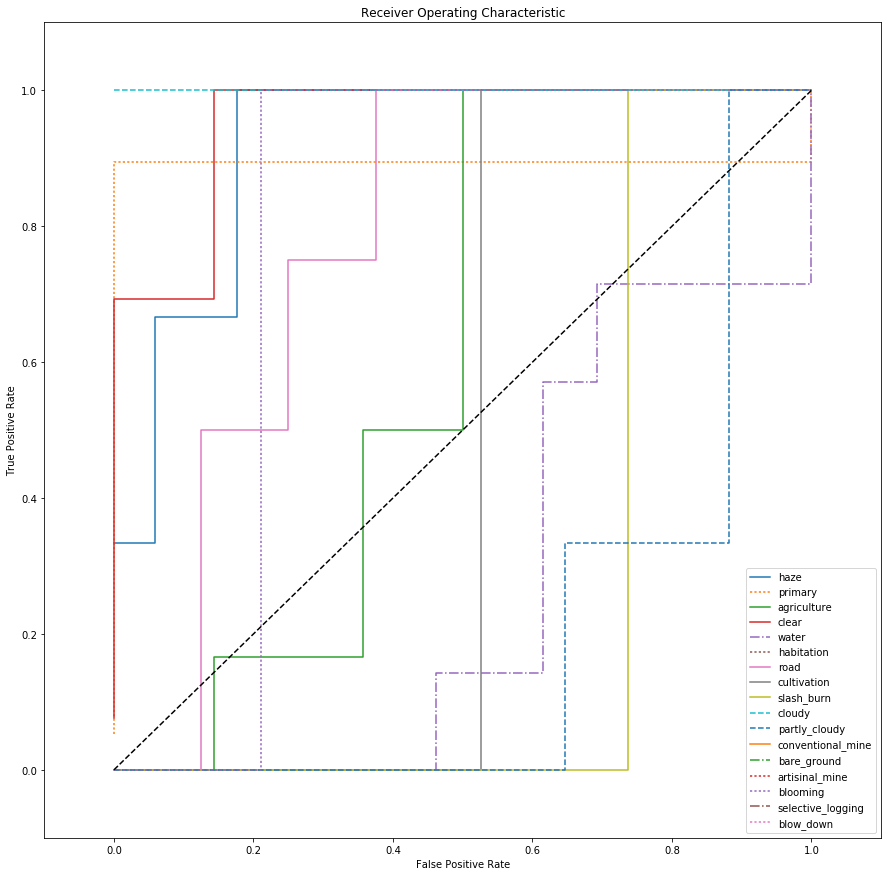

In [29]:
t = calc_threshold('./weights-v9.hdf5', toy=100)

In [ ]:
path = './weights-v9.hdf5'
toy = None

m = Models.load_resnet50(path)
d = Data(train=[0], toy=toy)
X, y = d.get_fold(0)
y_pred = m.predict(X, verbose=1)
thres = threshold(y_pred, y)

In [25]:
[0.23067564,
 0.27402788,
 0.15499838,
 0.18645976,
 0.12418672,
 0.093219191,
 0.14909597,
 0.13256209,
 0.041971382,
 0.17731731,
 0.10376091,
 0.25468382,
 0.090709485,
 0.13336645,
 0.13344041,
 0.10004906,
 0.036582272]

[0.23067564,
 0.27402788,
 0.15499838,
 0.18645976,
 0.12418672,
 0.093219191,
 0.14909597,
 0.13256209,
 0.041971382,
 0.17731731,
 0.10376091,
 0.25468382,
 0.090709485,
 0.13336645,
 0.13344041,
 0.10004906,
 0.036582272]

Calc thresh for tag haze
Best (tp, fp, tn, fn) is (446.0, 313.0, 7261, 76)
Calc thresh for tag primary
Best (tp, fp, tn, fn) is (7464.0, 242.0, 359, 31)
Calc thresh for tag agriculture
Best (tp, fp, tn, fn) is (2347.0, 960.0, 4655, 134)
Calc thresh for tag clear
Best (tp, fp, tn, fn) is (5642.0, 421.0, 1982, 51)
Calc thresh for tag water
Best (tp, fp, tn, fn) is (1321.0, 986.0, 5604, 185)
Calc thresh for tag habitation
Best (tp, fp, tn, fn) is (664.0, 737.0, 6606, 89)
Calc thresh for tag road
Best (tp, fp, tn, fn) is (1463.0, 782.0, 5702, 149)
Calc thresh for tag cultivation
Best (tp, fp, tn, fn) is (716.0, 1222.0, 5997, 161)
Calc thresh for tag slash_burn
Best (tp, fp, tn, fn) is (21.0, 236.0, 7822, 17)
Calc thresh for tag cloudy
Best (tp, fp, tn, fn) is (393.0, 182.0, 7500, 21)
Calc thresh for tag partly_cloudy
Best (tp, fp, tn, fn) is (1427.0, 259.0, 6370, 40)
Calc thresh for tag conventional_mine
Best (tp, fp, tn, fn) is (5.0, 11.0, 8072, 8)
Calc thresh for tag bare_ground
Best (tp, fp, tn, fn) is (119.0, 347.0, 7562, 68)
Calc thresh for tag artisinal_mine
Best (tp, fp, tn, fn) is (60.0, 37.0, 7993, 6)
Calc thresh for tag blooming
Best (tp, fp, tn, fn) is (24.0, 57.0, 7981, 34)
Calc thresh for tag selective_logging
Best (tp, fp, tn, fn) is (32.0, 117.0, 7921, 26)
Calc thresh for tag blow_down
Best (tp, fp, tn, fn) is (12.0, 61.0, 8010, 13)